<a href="https://colab.research.google.com/github/EtheSonX082531/PYTHON-CODES-AND-PROJECTS/blob/main/Money_Withdrawn_Langgraph_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [49]:
class AgentState(TypedDict):
     balance:int
     withdraw_amount:int
     status:str
     message:str

In [50]:
def input_node(state:AgentState)->AgentState:
    state["balance"]=int(input("Enter balance:"))
    state["withdraw_amount"]=int(input("Enter Withdraw amount:"))
    return state

In [51]:
def check_balance_node(state:AgentState)->AgentState:
    return state;

In [52]:
def router(state:AgentState)->str:
    if(state["withdraw_amount"]<=state["balance"]):
         return "withdraw_edge"
    else:
        return "reject_edge"

In [53]:
def withdraw_node(state:AgentState)->AgentState:
     state["balance"]=state["balance"]-state["withdraw_amount"]
     state["message"]=f"Withdrawn Successful!New Balance: {state['balance']}"
     return state

In [54]:
def reject_node(state:AgentState)-> AgentState:
    state["message"]="Sry Insufficient Balance."
    return state;

In [55]:
def final_node(state:AgentState)->AgentState:
    return state

In [57]:
graph=StateGraph(AgentState)
graph.add_node("input_node",input_node)
graph.add_node("check_balance_node",check_balance_node)
graph.add_node("withdraw_node",withdraw_node)
graph.add_node("reject_node",reject_node)
graph.add_node("final_node",final_node)

In [58]:
graph.add_edge(START,"input_node")
graph.add_edge("input_node","check_balance_node")
graph.add_conditional_edges(
    "check_balance_node",
    router,
    {
     "withdraw_edge":"withdraw_node",
     "reject_edge":"reject_node"
    }
)
graph.add_edge("withdraw_node","final_node")
graph.add_edge("reject_node","final_node")
graph.add_edge("final_node",END)

In [59]:
app=graph.compile();
Output=app.invoke({
    "balance": 0,
    "withdraw_amount": 0
})

print(Output["message"])

Enter balance:500
Enter Withdraw amount:400
Withdrawn Successful!New Balance: 100


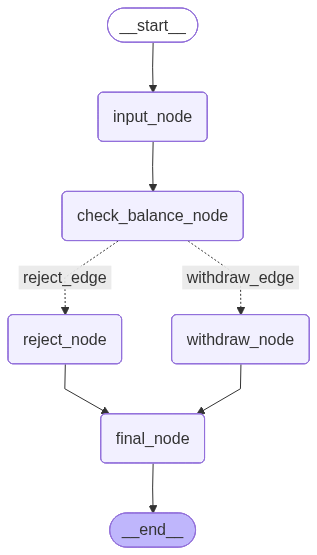

In [60]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))